# Dimensionality Reduction

- Improve model performance by reducing the size of the feature space.
- Dimensionality reduction algorithms project high-dimensional data to a low-dimensional space, retaining as much of the salient information as possible while removing redundant information.
- DR can be a goal by itself and is sometimes used in anomaly detection.

## References

1. Hands-on Unsupervised Learning, Chapter 3
1. Practical Statistics for Data Science, Chapter 5
1. Hands-on Machine Learning, Chapter 8
1. [Principal Components Analysis: A Brief Introduction](https://www.youtube.com/watch?v=KO8VhTPmZPw)
1. [The Multidimensional Scaling (MDS) algorithm for dimensionality reduction](https://medium.com/datadriveninvestor/the-multidimensional-scaling-mds-algorithm-for-dimensionality-reduction-9211f7fa5345)
1. [Visualize multidimensional datasets with MDS](https://towardsdatascience.com/visualize-multidimensional-datasets-with-mds-64d7b4c16eaa)
1. [Singular Value Decomposition Example In Python](https://towardsdatascience.com/singular-value-decomposition-example-in-python-dab2507d85a0)

## Example Dataset

MNIST Digits is a dataset of handwritten digits. This dataset has been divided into three sets—a training set with 50,000 examples, a validation set with 10,000 examples, and a test set with 10,000 examples. We have labels for all the examples.

This dataset consists of 28x28 pixel images of handwritten digits. Every single data point (i.e., every image) can be conveyed as an array of numbers, where each number describes how dark each pixel is. In other
words, a 28x28 array of numbers corresponds to a 28x28 pixel image.

To make this simpler, we can flatten each array into a 28x28, or 784, dimensional vector. Each component of the vector is a float between zero and one—representing the intensity of each pixel in the image. Zero stands for black; one stands for white. The labels are numbers between zero and nine, and indicate which digit the image represents.

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
# Verify shape of datasets
print("Shape of X_train: ", X.shape)
print("Shape of y_train: ", y.shape)

Shape of X_train:  (70000, 784)
Shape of y_train:  (70000,)


In [5]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): [0, 1, 2, 3, ..., 6, 7, 8, 9]

In [7]:
def view_digit(example):
    label = y.iloc[example]
    image = X.iloc[example,:].values.reshape([28, 28])
    plt.title(f'Label: {label}')
    plt.imshow(image, cmap=plt.get_cmap('binary'))
    plt.axis('off')

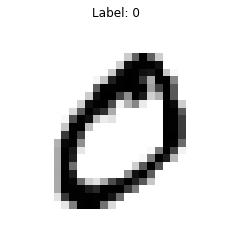

In [8]:
view_digit(1)

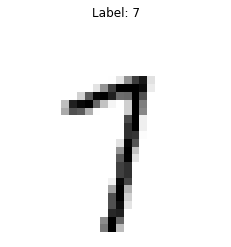

In [9]:
view_digit(42)

# Principal Component Analysis (PCA)

Advantages:
- Used as a regressor or classifier.
- Separate data to show hidden patterns.
- Improve model computation performance with less features.

Disadvantages:
- Loss of some information, but done in a wise, mathematical way.
- Mainly useful for numeric features (categorical features could be included, but very difficult).
- Requires some intuition or experimentation in selecting number of features, or explained variance limit.

## Algorithm

- Unsupervised learning algorithm.
- Uses linear projection to reduce the dimensionality of the sample space.
- If $X_1, \ldots, X_p$ are *linearly independent*, they form a *basis* for $p$-dimensional space, but because of multi-colinearity they may not be the most natural basis.
- Instead we find *linear combinations* such that starting with $j=1$ each $P_j$ the most remaining information is the direction orthogonal to all previous $P_k$ for $k<j$.

For two variables:

$$
    P_j = a_1X_1 + a_2X_2
$$

Generalized:

$$
    P_j = \Sigma_{k=1}^{p}a_kX_k
$$

- So $P_1, \ldots, P_p$ form an *orthogonal basis* rotated in a way to align well with the data, making it a natural basis.

## PCA Interpretation

- The first principal component $P_1$ is a linear combination of $X_1$ and $X_2$ in the direction where the data has the most variation, which is why $∣∣P_1∣∣>∣∣P_2∣∣$ (we use $∣∣v∣∣$ to refer to the norm of a vector $v$).
- The second principal component $P_2$ is another linear combination of $X_1$ and $X_2$ in the direction that is (1) perpendicular to the first one and (2) has the most remaining variation.
    - in 2D, once you fix the direction of $P_1$ the direction of $P_2$ is given.
- And so on, with however many dimensions to be projected.
- $P_1, \ldots, P_p$ are the new axes of the transformed sample space.

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std)

In [12]:
pca = PCA(n_components=784, whiten=False, random_state=0)
X_pca = pca.fit_transform(X_std)
X_pca = pd.DataFrame(X_pca)

In [13]:
X_pca

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-0.891720,-4.929711,-0.093038,-8.064180,-0.751001,1.051980,0.283377,1.423696,-1.168523,2.406929,...,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00
1,8.813530,-7.517560,-3.714185,-1.766171,0.891472,-5.107950,-0.134795,3.197223,-0.238224,-1.003382,...,-3.784147e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.088797e-16,-4.758019e-15,-7.432382e-15,-4.257921e-16,6.409425e-16
2,2.204835,9.824461,-5.752488,1.479673,4.397900,2.507393,18.927843,3.888938,2.443365,-0.145296,...,-7.928591e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.396895e-15,-3.783533e-16,-3.095305e-15,-1.162114e-15,-2.770599e-17
3,-6.534627,-4.029669,3.524017,-0.218098,5.606259,3.493731,1.445046,-4.683887,-0.613930,-2.533648,...,-1.599111e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.495596e-14,5.210519e-15,1.324229e-14,2.617400e-15,5.460764e-16
4,-5.251618,3.278848,-6.182219,1.462658,-1.667989,-0.580801,-0.565828,-3.129538,0.005915,-0.972611,...,5.676457e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.182326e-14,-3.786224e-15,-5.451111e-15,-7.230625e-16,-6.338942e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,3.917881,2.892419,9.949220,-2.026794,-0.893630,10.701453,-5.194376,1.941835,-4.810929,-3.655669,...,-6.553066e-17,-7.801284e-18,-4.082319e-17,-2.180652e-17,3.120290e-18,3.156630e-17,-4.494787e-18,2.784070e-17,5.112991e-17,-1.842202e-18
69996,3.988380,3.381637,7.714120,-7.300283,-2.417398,-2.902458,-1.120196,6.798138,-2.166906,0.092647,...,-2.442141e-17,-5.152789e-17,2.300842e-17,-2.231552e-17,2.706119e-18,8.049142e-18,1.550173e-17,1.418432e-17,-2.978385e-17,1.565646e-18
69997,-5.222595,-1.184316,-4.754725,0.148113,-4.383838,4.668514,-5.142121,-1.334809,0.659764,0.548709,...,-3.433881e-18,-1.860239e-17,3.400215e-17,2.045446e-17,-1.642719e-17,-3.019924e-17,-1.625536e-17,9.370275e-18,5.182974e-18,-4.198675e-19
69998,-2.177729,-6.995033,-3.228737,1.890282,4.332407,-0.846104,-3.363003,1.797760,9.549834,2.533057,...,-8.216145e-18,1.027995e-18,-1.343689e-17,-3.483743e-17,1.434647e-17,3.084909e-17,-2.337343e-18,-3.550258e-18,-2.125480e-17,5.721897e-18


In [14]:
# Percentage of Variance Captured by 784 principal components
print('Variance explained by all 784 principal components: ', sum(pca.explained_variance_ratio_))

Variance explained by all 784 principal components:  0.9999999999999998


In [15]:
pca.components_.shape

(784, 784)

In [16]:
pca.components_

array([[-3.42475296e-20,  2.77555756e-17,  2.77555756e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-2.64361105e-19, -2.77555756e-17,  2.22044605e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.39357327e-21, -3.20923843e-17,  3.46944695e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [-0.00000000e+00, -2.60213342e-01,  3.35967590e-03, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -9.25510979e-04,  1.31798051e-03, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00, -3.58170257e-02,  3.34194844e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [17]:
feature1 = np.argmax(np.abs(pca.components_[0,:]))
print(f'Component with highest explained variance: {feature1}')

Component with highest explained variance: 386


In [18]:
feature2 = np.argmax(np.abs(pca.components_[1,:]))
print(f'Component with highest explained variance: {feature2}')

Component with highest explained variance: 259


In [19]:
# Percentage of Variance Captured by X principal components
importance_pca = pd.DataFrame(data=pca.explained_variance_ratio_)
importance_pca = importance_pca.rename({0:'var_ratio'}, axis=1)
importance_pca.head()

,var_ratio
0,0.056427
1,0.040412
2,0.037383
3,0.028930
4,0.025208


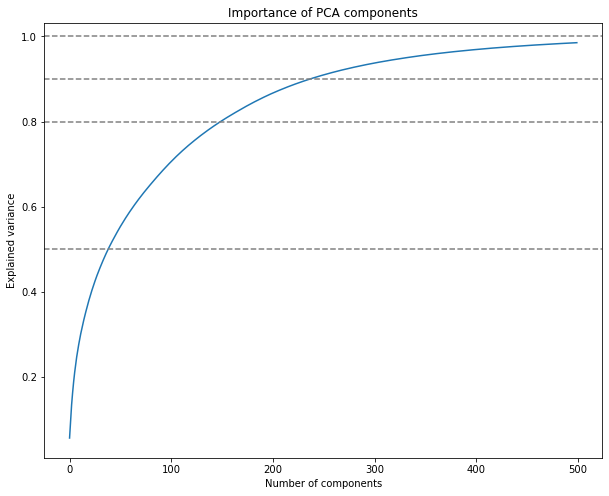

In [20]:
plt.figure(figsize=(10,8))
sns.lineplot(x=importance_pca[:500].index, y='var_ratio', data=np.cumsum(importance_pca[:500]))
plt.axhline(0.5, linestyle='--', color='grey')
plt.axhline(0.8, linestyle='--', color='grey')
plt.axhline(0.9, linestyle='--', color='grey')
plt.axhline(1, linestyle='--', color='grey')
plt.title('Importance of PCA components')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

In [21]:
scatter_orig = pd.concat((X_std.loc[:,[feature1,feature2]], y), axis=1, join="inner")
scatter_orig.columns = ["First Vector", "Second Vector", "Label"]

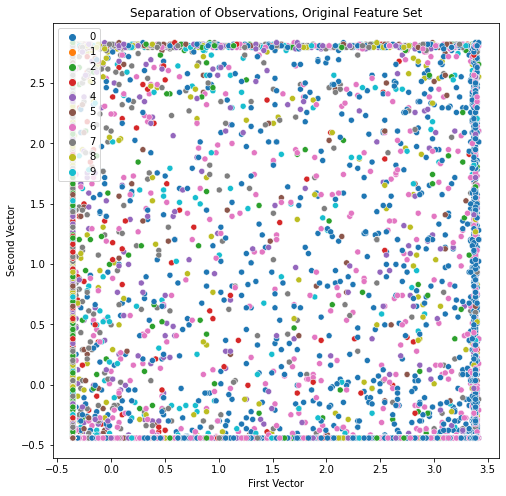

In [22]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="First Vector", y="Second Vector", hue="Label", data=scatter_orig)
plt.title("Separation of Observations, Original Feature Set")
plt.legend(loc='upper left')
plt.show()

In [23]:
scatter_pca = pd.DataFrame(data=X_pca.loc[:,0:1], index=X_pca.index)
scatter_pca = pd.concat((scatter_pca, y), axis=1, join='inner')
scatter_pca.columns = ['First Vector', 'Second Vector', 'Label']

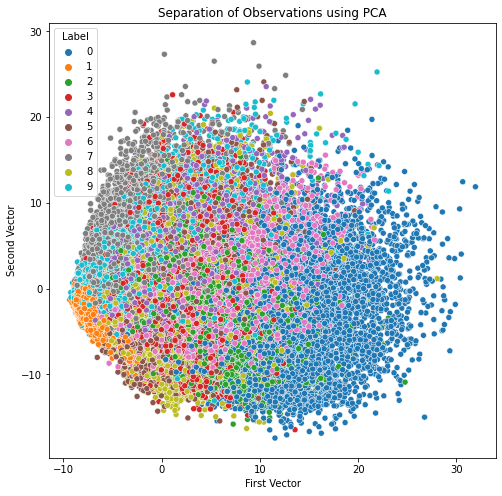

In [24]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="First Vector", y="Second Vector", hue="Label", data=scatter_pca)
plt.title("Separation of Observations using PCA")
plt.show()

## Principal Component Regression

Combines linear regression with PCA (PCA for feature engineering). PCR is a supervised algorithm.

$$
    Y = \beta_0 + \beta_1X_1 + \ldots + \beta_pX_p + \epsilon
$$

If $X_1, \ldots, X_p$ have strong multi-collinearity the predictions can get unstable (high variance).

we replace $X_j$ with a new set of features $P_j:=P_j(X_1, \ldots, X_p)$ , where $P_j$ is the $i$th principal component of $X_1, \ldots, X_p$

$$
    Y = \beta_0 + \beta_1X_1 + \ldots + \beta_pX_p + \epsilon
$$

No more multi-collinearity means we don't have to worry about interactions.

If $p$ is large, we would limit to the first $k<p$ features.

## Incremental PCA

For very large datasets that can't fit in memory, performs PCA in small, incremental batches. Batch size can be set manually or automatically.

In [25]:
from sklearn.decomposition import IncrementalPCA

In [26]:
ipca = IncrementalPCA(n_components=784, batch_size=None)
X_ipca = ipca.fit_transform(X_std)
X_ipca = pd.DataFrame(X_ipca)

In [27]:
scatter_ipca = pd.DataFrame(data=X_ipca.loc[:,0:1], index=X_ipca.index)
scatter_ipca = pd.concat((scatter_ipca, y), axis=1, join='inner')
scatter_ipca.columns = ['First Vector', 'Second Vector', 'Label']

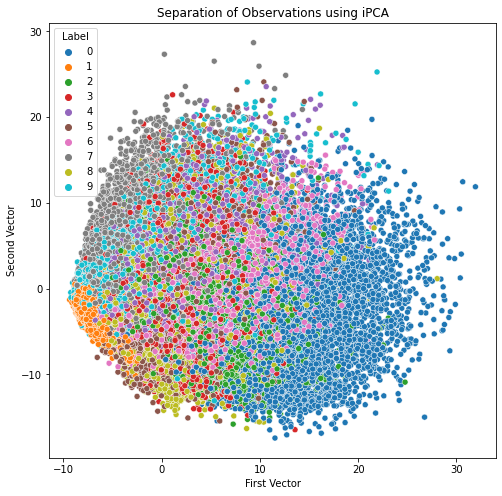

In [28]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="First Vector", y="Second Vector", hue="Label", data=scatter_ipca)
plt.title("Separation of Observations using iPCA")
plt.show()

## Sparse PCA

Instead of testing all feature linear combinations, this reduces the feature space by `alpha`. Training is somewhat slower than regular PCA.

In [29]:
from sklearn.decomposition import SparsePCA

In [30]:
spca = SparsePCA(n_components=100, alpha=0.0001, random_state=0, n_jobs=-1)
X_spca = spca.fit_transform(X_std)
X_spca = pd.DataFrame(X_spca)

In [31]:
scatter_spca = pd.DataFrame(data=X_spca.loc[:,0:1], index=X_spca.index)
scatter_spca = pd.concat((scatter_spca, y), axis=1, join='inner')
scatter_spca.columns = ['First Vector', 'Second Vector', 'Label']

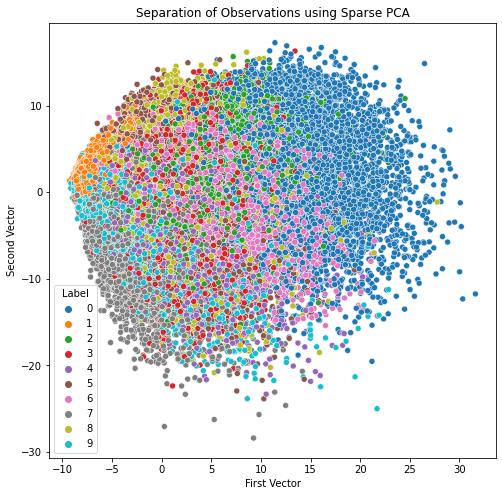

In [32]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="First Vector", y="Second Vector", hue="Label", data=scatter_spca)
plt.title("Separation of Observations using Sparse PCA")
plt.show()

Note: this scatterplot is different because I took the first 10000 samples.

## Kernel PCA

This is a non-linear form of PCA that runs a similarity function over pairs of original data points in order to perform non-linear dimension reduction. Effective when the original feature set is not linearly separable.

In [33]:
from sklearn.decomposition import KernelPCA

In [34]:
kpca = KernelPCA(n_components=784, kernel='rbf', gamma=None, n_jobs=1, random_state=0)
X_kpca = kpca.fit_transform(X_std.loc[:10_000,:]) # memory limit
X_kpca = pd.DataFrame(X_kpca)

In [35]:
scatter_kpca = pd.DataFrame(data=X_kpca.loc[:,0:1], index=X_kpca.index)
scatter_kpca = pd.concat((scatter_kpca, y), axis=1, join='inner')
scatter_kpca.columns = ['First Vector', 'Second Vector', 'Label']

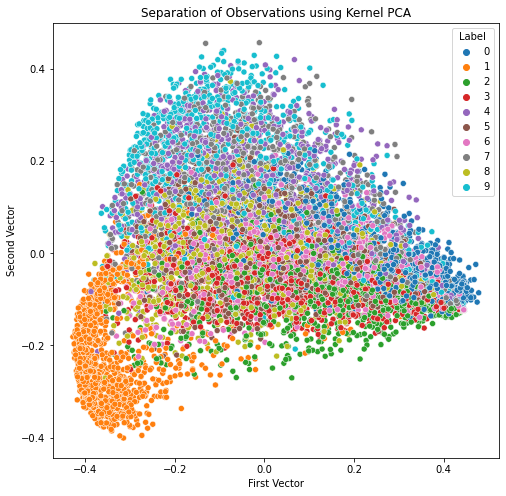

In [36]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="First Vector", y="Second Vector", hue="Label", data=scatter_kpca)
plt.title("Separation of Observations using Kernel PCA")
plt.show()

# Singular Value Decomposition

SVD is an approach to reduce the original matrix to a smaller matrix where it can be recreated using a linear combination of some of the vectors of the smaller matrix.

SVD keeps the vectors of the original matrix that has the most information. This is similar to PCA in that it uses eigen-decomposition of the covariance matrix to do dimensionality reduction.

In [37]:
from sklearn.decomposition import TruncatedSVD

In [38]:
svd = TruncatedSVD(n_components=200, algorithm='randomized', n_iter=5, random_state=0)
X_svd = svd.fit_transform(X_std)
X_svd = pd.DataFrame(X_svd)

In [39]:
scatter_svd = pd.DataFrame(data=X_svd.loc[:,0:1], index=X_svd.index)
scatter_svd = pd.concat((scatter_svd, y), axis=1, join='inner')
scatter_svd.columns = ['First Vector', 'Second Vector', 'Label']

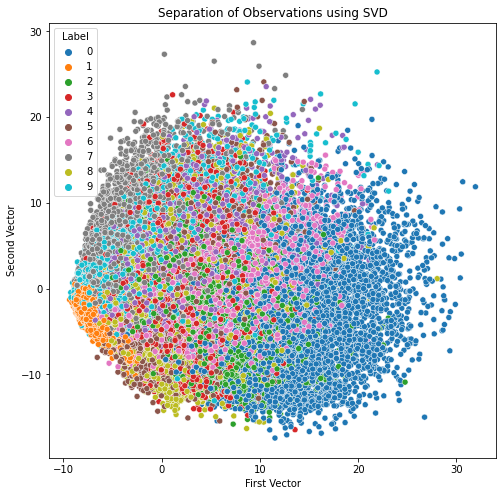

In [40]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="First Vector", y="Second Vector", hue="Label", data=scatter_svd)
plt.title("Separation of Observations using SVD")
plt.show()

# Random Projection

Random projection relies on the *Johnson-Lindenstrauss lemma*: low-distortion embeddings of points from high-dimensional into low-dimensional Euclidean space. The lemma states that a set of points in a high-dimensional space can be embedded into a space of much lower dimension in such a way that distances between the points are nearly preserved.

In other words, even as we move from high-dimensional space to low-dimensional space, the relevant structure of the original feature set is preserved.In other words, even as we move from high-dimensional space to low-dimensional space, the relevant structure of the original feature set is preserved.

In [41]:
from sklearn.random_projection import GaussianRandomProjection

In [42]:
grp = GaussianRandomProjection(n_components='auto', eps=0.5, random_state=0)
X_grp = grp.fit_transform(X_std)
X_grp = pd.DataFrame(X_grp)

In [43]:
scatter_grp = pd.DataFrame(data=X_grp.loc[:,0:1], index=X_grp.index)
scatter_grp = pd.concat((scatter_grp, y), axis=1, join='inner')
scatter_grp.columns = ['First Vector', 'Second Vector', 'Label']

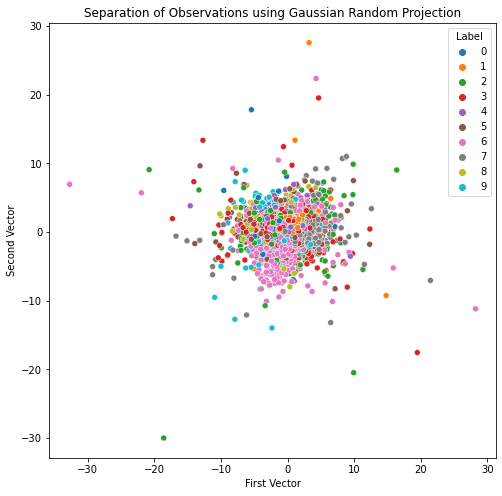

In [44]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="First Vector", y="Second Vector", hue="Label", data=scatter_grp)
plt.title("Separation of Observations using Gaussian Random Projection")
plt.show()

# Isomap

Isometric mapping uses nonlinear projection from high-dimensional space to lower-dimensional space using pairwise distances of all points.

Isomap relies on *curved/geodesic distance* rather than *Euclidean distance* in kernel PCA.

In [45]:
from sklearn.manifold import Isomap

In [46]:
isomap = Isomap(n_components=10, n_neighbors=5, n_jobs=4)
X_isomap = isomap.fit_transform(X_std.loc[:10_000,:])
X_isomap = pd.DataFrame(X_isomap)

In [47]:
scatter_isomap = pd.DataFrame(data=X_isomap.loc[:,0:1], index=X_isomap.index)
scatter_isomap = pd.concat((scatter_isomap, y), axis=1, join='inner')
scatter_isomap.columns = ['First Vector', 'Second Vector', 'Label']

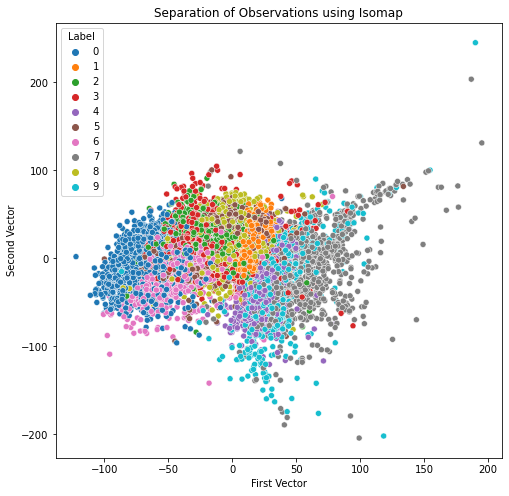

In [48]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="First Vector", y="Second Vector", hue="Label", data=scatter_isomap)
plt.title("Separation of Observations using Isomap")
plt.show()

# Multidimensional Scaling

*Multidimensional scaling (MDS)* is a form of nonlinear dimensionality reduction that learns the similarity of points in the original dataset and, using this similarity learning, models this in a lower dimensional space.

In [49]:
from sklearn.manifold import MDS

In [ ]:
mds = MDS(n_components=2, n_init=12, max_iter=1200, metric=True, n_jobs=4, random_state=0)
X_mds = mds.fit_transform(X_std.loc[:1000,:])
X_mds = pd.DataFrame(X_mds)

In [ ]:
scatter_mds = pd.DataFrame(data=X_mds.loc[:,0:1], index=X_mds.index)
scatter_mds = pd.concat((scatter_mds, y), axis=1, join='inner')
scatter_mds.columns = ['First Vector', 'Second Vector', 'Label']

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="First Vector", y="Second Vector", hue="Label", data=scatter_mds)
plt.title("Separation of Observations using MDS")
plt.show()

# Locally Linear Embedding

*Locally Linear Embedding (LLE)* preserves distances within the local neighborhoods as it projects from the high-dimensional space to the low-dimensional space. LLE segments the the high-dimensional data into components (neighborhoods of points) and models each component as a linear embedding.

In this algorithm we set the number of components (`n_components`) and points in a given neighborhood (`n_neighbors`).

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

In [ ]:
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='modified', n_jobs=4, random_state=0)
X_lle = lle.fit_transform(X_std.loc[:5000,:])
X_lle = pd.DataFrame(X_lle)

In [ ]:
scatter_lle = pd.DataFrame(data=X_lle.loc[:,0:1], index=X_lle.index)
scatter_lle = pd.concat((scatter_lle, y), axis=1, join='inner')
scatter_lle.columns = ['First Vector', 'Second Vector', 'Label']

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="First Vector", y="Second Vector", hue="Label", data=scatter_lle)
plt.title("Separation of Observations using LLE")
plt.show()

# t-Distributed Stochastic Neighbor Embedding

*t-distributed stochasitc neighbor embedding (t-SNE)* is a nonlinear technique into 2- or 3-dimensional space where similar points are modeled closer to each other and dissimilar points are farther away. It constructs two probability distributions, one over pairs of points in high-dimensional space and another over pairs of points in low-dimensional space. 

Similar points have high probability and dissimilar points have low probability. t-SNE specifically minimizes *Kullback-Leibler divergence* between two probability distributions.

t-SNE is best to use with another dimensionality reduction technique (such as PCA) to reduce noise and speed up computation.

Note: t-SNE has a nonconvex cost function, which means that different initializations of the algorithm will generate different results. There is no stable solution.t-SNE has a nonconvex cost function, which means that different initializations of the algorithm will generate different results. There is no stable solution.

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
t_sne = TSNE(n_components=2, learning_rate=300, perplexity=30, early_exaggeration=12, init='random', 
             random_state=0)
X_tsne = t_sne.fit_transform(X_pca.loc[:5000,:9]) # Using PCA data from above
X_tsne = pd.DataFrame(X_tsne)

In [ ]:
scatter_tsne = pd.DataFrame(data=X_tsne.loc[:,0:1], index=X_tsne.index)
scatter_tsne = pd.concat((scatter_tsne, y), axis=1, join='inner')
scatter_tsne.columns = ['First Vector', 'Second Vector', 'Label']

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="First Vector", y="Second Vector", hue="Label", data=scatter_tsne)
plt.title("Separation of Observations using t-SNE")
plt.show()